# Steps followed -


#1 - Data loading (pandas.read_csv())
#2 - Data Exploration (dtype, isnull, shape() etc.)
#3 - Feature Engineering (.log())
#4 - Dimensionality Reduction (PCA)
#5 - Clustering (K-means)
#6 - Performance measure (Silhouette Score)
#7 - Clusters Exported (.to_csv)

In [71]:
#Data Loading and Preparation
import pandas as pd
df1 = pd.read_csv("category_spends_sample.csv")
df2= pd.read_csv("lineitems_sample.csv")
df1.head()

,customer_number,fruit_veg,dairy,confectionary,grocery_food,grocery_health_pets,bakery,newspapers_magazines,prepared_meals,soft_drinks,...,meat,tobacco,drinks,deli,world_foods,lottery,cashpoint,seasonal_gifting,discount_bakery,practical_items
0,11387,£64.58,£35.91,£107.78,£27.08,£29.59,£0.00,£54.83,£6.35,£22.83,...,£28.62,£162.10,£28.02,£28.12,£28.54,£2.00,£15.00,£7.48,£0.00,£0.84
1,8171,£16.89,£37.24,£28.84,£33.43,£66.40,£0.00,£22.06,£12.09,£2.34,...,£26.44,£0.00,£8.42,£2.65,£3.76,£0.00,£0.00,£9.99,£0.00,£0.00
2,1060,£87.30,£82.98,£49.88,£20.57,£37.04,£0.00,£9.85,£57.98,£31.12,...,£54.65,£0.00,£0.00,£2.60,£0.00,£18.00,£20.00,£106.46,£0.00,£0.00
3,3728,£84.05,£186.56,£175.50,£119.84,£111.08,£0.00,£13.05,£25.54,£124.42,...,£0.95,£127.70,£0.00,£0.00,£0.00,£4.00,£0.00,£0.00,£0.00,£4.50
4,14621,£35.16,£121.31,£79.23,£29.03,£37.17,£0.00,£40.06,£0.00,£4.68,...,£36.24,£0.00,£2.55,£99.16,£0.00,£0.00,£0.00,£3.40,£0.00,£0.00


# Data Exploration

In [72]:
#Check unique values in the data
len(df1['customer_number'].unique())

3000

In [73]:
number = df1['customer_number']

In [74]:
#Dropping the two data features and checking the shape of the data
df1.drop(['bakery','cashpoint'], axis = 1, inplace = True)
print('Number of datapoints:', df1.shape[0])
print('Number of features:', df1.shape[1])

Number of datapoints: 3000
Number of features: 19


In [75]:
#Check data type
print(df1.dtypes)
print(df2.dtypes)

customer_number          int64
fruit_veg               object
dairy                   object
confectionary           object
grocery_food            object
grocery_health_pets     object
newspapers_magazines    object
prepared_meals          object
soft_drinks             object
frozen                  object
meat                    object
tobacco                 object
drinks                  object
deli                    object
world_foods             object
lottery                 object
seasonal_gifting        object
discount_bakery         object
practical_items         object
dtype: object
customer_number     int64
purchase_time      object
product_id          int64
category           object
quantity            int64
spend              object
dtype: object


In [43]:
# check data basic info using .info()
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461315 entries, 0 to 1461314
Data columns (total 6 columns):
 #   Column           Non-Null Count    Dtype 
---  ------           --------------    ----- 
 0   customer_number  1461315 non-null  int64 
 1   purchase_time    1461315 non-null  object
 2   product_id       1461315 non-null  int64 
 3   category         1461315 non-null  object
 4   quantity         1461315 non-null  int64 
 5   spend            1461315 non-null  object
dtypes: int64(3), object(3)
memory usage: 66.9+ MB


Removing "£" Sign

In [44]:
def func(value):
    return float(value.replace(",","").replace("£",""))

In [45]:
df1['fruit_veg'] = df1['fruit_veg'].apply(func)
df1['dairy'] = df1['dairy'].apply(func)
df2['spend'] = df2['spend'].apply(func)
df1['confectionary'] = df1['confectionary'].apply(func)
df1['grocery_food'] = df1['grocery_food'].apply(func)
df1['grocery_health_pets'] = df1['grocery_health_pets'].apply(func)
df1['newspapers_magazines'] = df1['newspapers_magazines'].apply(func)
df1['prepared_meals'] = df1['prepared_meals'].apply(func)
df1['soft_drinks'] = df1['soft_drinks'].apply(func)
df1['frozen'] = df1['frozen'].apply(func)
df1['meat'] = df1['meat'].apply(func)
df1['tobacco'] = df1['tobacco'].apply(func)
df1['drinks'] = df1['drinks'].apply(func)
df1['deli'] = df1['deli'].apply(func)
df1['world_foods'] = df1['world_foods'].apply(func)
df1['lottery'] = df1['lottery'].apply(func)
#df1['cashpoint'] = df1['cashpoint'].apply(func)
df1['seasonal_gifting'] = df1['seasonal_gifting'].apply(func)
df1['discount_bakery'] = df1['discount_bakery'].apply(func)
df1['practical_items'] = df1['practical_items'].apply(func)


NULL VALUES

In [46]:
#checking null values
df1.isnull().sum()

customer_number         0
fruit_veg               0
dairy                   0
confectionary           0
grocery_food            0
grocery_health_pets     0
newspapers_magazines    0
prepared_meals          0
soft_drinks             0
frozen                  0
meat                    0
tobacco                 0
drinks                  0
deli                    0
world_foods             0
lottery                 0
seasonal_gifting        0
discount_bakery         0
practical_items         0
dtype: int64

NEGATIVE VALUES

In [47]:
#checking negative values via min using .describe()
df1.lottery.describe()

count    3000.000000
mean       14.165603
std        48.469754
min       -74.000000
25%         0.000000
50%         0.000000
75%         6.000000
max       946.000000
Name: lottery, dtype: float64

In [48]:
#considering the value greater than equal to zero
for i in df1:
    df1[i] = df1[i].loc[df1[i] >= 0]

df2['spend'] = df2['spend'].loc[df2['spend'] >= 0]

In [49]:
#statistical summary
df1.describe()


,customer_number,fruit_veg,dairy,confectionary,grocery_food,grocery_health_pets,newspapers_magazines,prepared_meals,soft_drinks,frozen,meat,tobacco,drinks,deli,world_foods,lottery,seasonal_gifting,discount_bakery,practical_items
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,2971.000000,3000.000000,3000.000000,3000.000000
mean,8095.724333,69.456163,71.302683,57.347793,60.007530,60.909867,16.653390,35.48057,23.303350,35.466020,54.740687,92.547613,62.242217,13.736440,8.554260,14.398320,6.126987,1.814837,2.016220
std,4686.259488,70.499654,57.966265,55.959350,57.682533,69.805023,26.377091,41.24047,35.695592,41.477609,67.802126,201.703812,121.500365,25.486136,14.757745,48.628111,13.104271,9.450367,4.322232
min,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4044.750000,22.695000,31.390000,21.070000,21.087500,18.145000,1.500000,8.70000,3.750000,8.777500,12.640000,0.000000,0.000000,0.000000,0.890000,0.000000,0.000000,0.000000,0.000000
50%,8218.500000,50.935000,56.875000,42.290000,44.030000,39.075000,7.345000,23.09500,11.685000,22.275000,32.930000,2.030000,12.830000,3.495000,3.760000,0.000000,1.990000,0.000000,0.000000
75%,12115.500000,93.405000,95.327500,75.125000,80.922500,77.250000,19.687500,47.33000,28.782500,47.237500,72.380000,81.030000,65.150000,15.770000,10.647500,6.000000,6.720000,0.000000,2.510000
max,16316.000000,1262.970000,708.040000,614.370000,1017.070000,884.450000,351.730000,454.29000,529.650000,385.800000,713.280000,2488.940000,1005.330000,316.190000,321.490000,946.000000,229.440000,173.060000,65.060000


In [50]:
import numpy as np
df1 = df1.replace(np.nan, 0, regex=True)
df2 = df2.replace(np.nan, 0, regex = True)

In [51]:
df1.shape
df2.spend.describe()

count    1.461315e+06
mean     1.583058e+00
std      2.564342e+00
min      0.000000e+00
25%      6.800000e-01
50%      1.030000e+00
75%      1.730000e+00
max      3.600000e+02
Name: spend, dtype: float64

# Generating features - total_spend, frequency and recency 

In [52]:
df2['purchase_time'].max()

'2007-08-31 21:55:00'

In [53]:
#present date assumed to be the next day after last date in the data
import datetime as dt
present = dt.datetime(2007,9,2)

df2['purchase_time'] = pd.to_datetime(df2['purchase_time'])

In [54]:
f = df2.groupby('customer_number').agg({'purchase_time': lambda num: num.nunique()}) 
m = df2.groupby('customer_number').agg({'spend': lambda price: price.sum()}) 
r = df2.groupby('customer_number').agg({'purchase_time': lambda date: (present - date.max()).days})

In [55]:
m.columns = ['total_spend']
r.columns = ['recency']
f.columns = ['frequency']

In [56]:
df3 = pd.merge(df1, m, on = 'customer_number')
df4 = pd.merge(df3, r, on = 'customer_number')
df = pd.merge(df4, f, on = 'customer_number')
df


,customer_number,fruit_veg,dairy,confectionary,grocery_food,grocery_health_pets,newspapers_magazines,prepared_meals,soft_drinks,frozen,...,drinks,deli,world_foods,lottery,seasonal_gifting,discount_bakery,practical_items,total_spend,recency,frequency
0,11387,64.58,35.91,107.78,27.08,29.59,54.83,6.35,22.83,21.51,...,28.02,28.12,28.54,2.0,7.48,0.0,0.84,697.76,13,64
1,8171,16.89,37.24,28.84,33.43,66.40,22.06,12.09,2.34,78.74,...,8.42,2.65,3.76,0.0,9.99,0.0,0.00,369.31,2,50
2,1060,87.30,82.98,49.88,20.57,37.04,9.85,57.98,31.12,14.53,...,0.00,2.60,0.00,18.0,106.46,0.0,0.00,668.68,15,40
3,3728,84.05,186.56,175.50,119.84,111.08,13.05,25.54,124.42,15.24,...,0.00,0.00,0.00,4.0,0.00,0.0,4.50,1104.10,2,51
4,14621,35.16,121.31,79.23,29.03,37.17,40.06,0.00,4.68,3.33,...,2.55,99.16,0.00,0.0,3.40,0.0,0.00,524.45,8,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,12541,64.52,73.84,89.36,135.31,61.99,0.00,61.02,56.62,95.22,...,0.00,0.00,3.36,0.0,0.00,0.0,2.53,800.43,7,82
2996,16081,5.91,18.08,18.32,23.69,16.12,5.39,15.96,0.67,0.99,...,0.00,7.73,9.74,30.0,0.00,0.0,1.61,222.26,1,51
2997,7094,116.54,106.08,42.31,35.92,43.59,13.68,1.78,21.44,2.89,...,7.65,4.10,2.59,0.0,0.00,0.0,6.79,448.42,6,20
2998,3457,3.68,13.44,21.96,10.10,12.51,4.75,1.04,4.33,8.19,...,0.00,8.27,1.65,0.0,1.98,0.0,0.00,115.90,114,32


In [57]:
#Statistical summary
new_features = df.columns[19:]
df[new_features].describe()

,total_spend,recency,frequency
count,3000.000000,3000.000000,3000.000000
mean,771.115683,9.121333,65.182333
std,554.236655,20.938531,47.464717
min,7.280000,1.000000,1.000000
25%,406.707500,1.000000,32.000000
50%,627.565000,3.000000,53.000000
75%,960.585000,7.000000,86.000000
max,6588.650000,165.000000,374.000000


In [58]:
#checking median of generated feature
df[new_features].median()

total_spend    627.565
recency          3.000
frequency       53.000
dtype: float64

In [59]:
df.drop([ 'customer_number'], axis = 1, inplace = True)

In [60]:
df.head()

,fruit_veg,dairy,confectionary,grocery_food,grocery_health_pets,newspapers_magazines,prepared_meals,soft_drinks,frozen,meat,...,drinks,deli,world_foods,lottery,seasonal_gifting,discount_bakery,practical_items,total_spend,recency,frequency
0,64.58,35.91,107.78,27.08,29.59,54.83,6.35,22.83,21.51,28.62,...,28.02,28.12,28.54,2.0,7.48,0.0,0.84,697.76,13,64
1,16.89,37.24,28.84,33.43,66.40,22.06,12.09,2.34,78.74,26.44,...,8.42,2.65,3.76,0.0,9.99,0.0,0.00,369.31,2,50
2,87.30,82.98,49.88,20.57,37.04,9.85,57.98,31.12,14.53,54.65,...,0.00,2.60,0.00,18.0,106.46,0.0,0.00,668.68,15,40
3,84.05,186.56,175.50,119.84,111.08,13.05,25.54,124.42,15.24,0.95,...,0.00,0.00,0.00,4.0,0.00,0.0,4.50,1104.10,2,51
4,35.16,121.31,79.23,29.03,37.17,40.06,0.00,4.68,3.33,36.24,...,2.55,99.16,0.00,0.0,3.40,0.0,0.00,524.45,8,90


# Check Correlation

In [61]:
df.corr()

,fruit_veg,dairy,confectionary,grocery_food,grocery_health_pets,newspapers_magazines,prepared_meals,soft_drinks,frozen,meat,...,drinks,deli,world_foods,lottery,seasonal_gifting,discount_bakery,practical_items,total_spend,recency,frequency
fruit_veg,1.000000,0.629616,0.465602,0.640928,0.490674,0.136383,0.449565,0.259851,0.420811,0.550687,...,0.108806,0.225524,0.206913,-0.018035,0.206127,0.046758,0.272480,0.581859,-0.169856,0.203123
dairy,0.629616,1.000000,0.610100,0.651492,0.557530,0.219894,0.509525,0.404795,0.531251,0.492942,...,0.070143,0.224616,0.243247,0.038539,0.234176,0.000576,0.277045,0.680254,-0.204230,0.376453
confectionary,0.465602,0.610100,1.000000,0.574594,0.577793,0.211944,0.471222,0.537825,0.574330,0.440183,...,0.013506,0.206669,0.246258,0.014691,0.277407,0.057857,0.274943,0.630198,-0.156000,0.290172
grocery_food,0.640928,0.651492,0.574594,1.000000,0.581256,0.130919,0.481753,0.365991,0.569792,0.556404,...,0.092420,0.212570,0.180413,0.011802,0.195960,0.043531,0.260195,0.658181,-0.165360,0.239875
grocery_health_pets,0.490674,0.557530,0.577793,0.581256,1.000000,0.149942,0.454817,0.423348,0.529290,0.450822,...,0.105609,0.202879,0.164953,0.001445,0.275854,0.052803,0.328277,0.645255,-0.136923,0.203425
newspapers_magazines,0.136383,0.219894,0.211944,0.130919,0.149942,1.000000,0.116249,0.166075,0.145995,0.136534,...,0.055905,0.106366,0.210119,0.183722,0.130389,0.034357,0.134072,0.342776,-0.136679,0.443945
prepared_meals,0.449565,0.509525,0.471222,0.481753,0.454817,0.116249,1.000000,0.347851,0.452483,0.486497,...,0.087040,0.138281,0.216741,0.009823,0.178150,-0.004831,0.203791,0.561769,-0.134440,0.209498
soft_drinks,0.259851,0.404795,0.537825,0.365991,0.423348,0.166075,0.347851,1.000000,0.390323,0.369143,...,0.153551,0.158215,0.130028,0.063565,0.196315,0.053548,0.155121,0.547838,-0.096178,0.291506
frozen,0.420811,0.531251,0.574330,0.569792,0.529290,0.145995,0.452483,0.390323,1.000000,0.457836,...,0.054573,0.185054,0.196964,-0.016269,0.192881,0.108158,0.230981,0.565916,-0.131577,0.213690
meat,0.550687,0.492942,0.440183,0.556404,0.450822,0.136534,0.486497,0.369143,0.457836,1.000000,...,0.188029,0.194788,0.192628,0.007574,0.223709,0.058332,0.255498,0.606046,-0.129191,0.182517


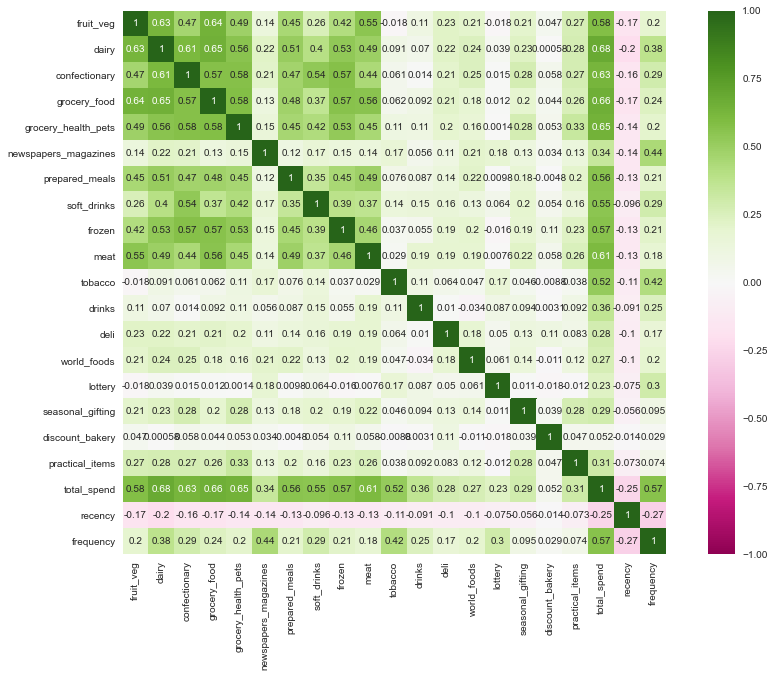

In [64]:
#Visualizing correlation graph using seaborn and matplotlib library
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot = True, vmin=-1, vmax=1, center= 0, square = True, cmap= 'PiYG');

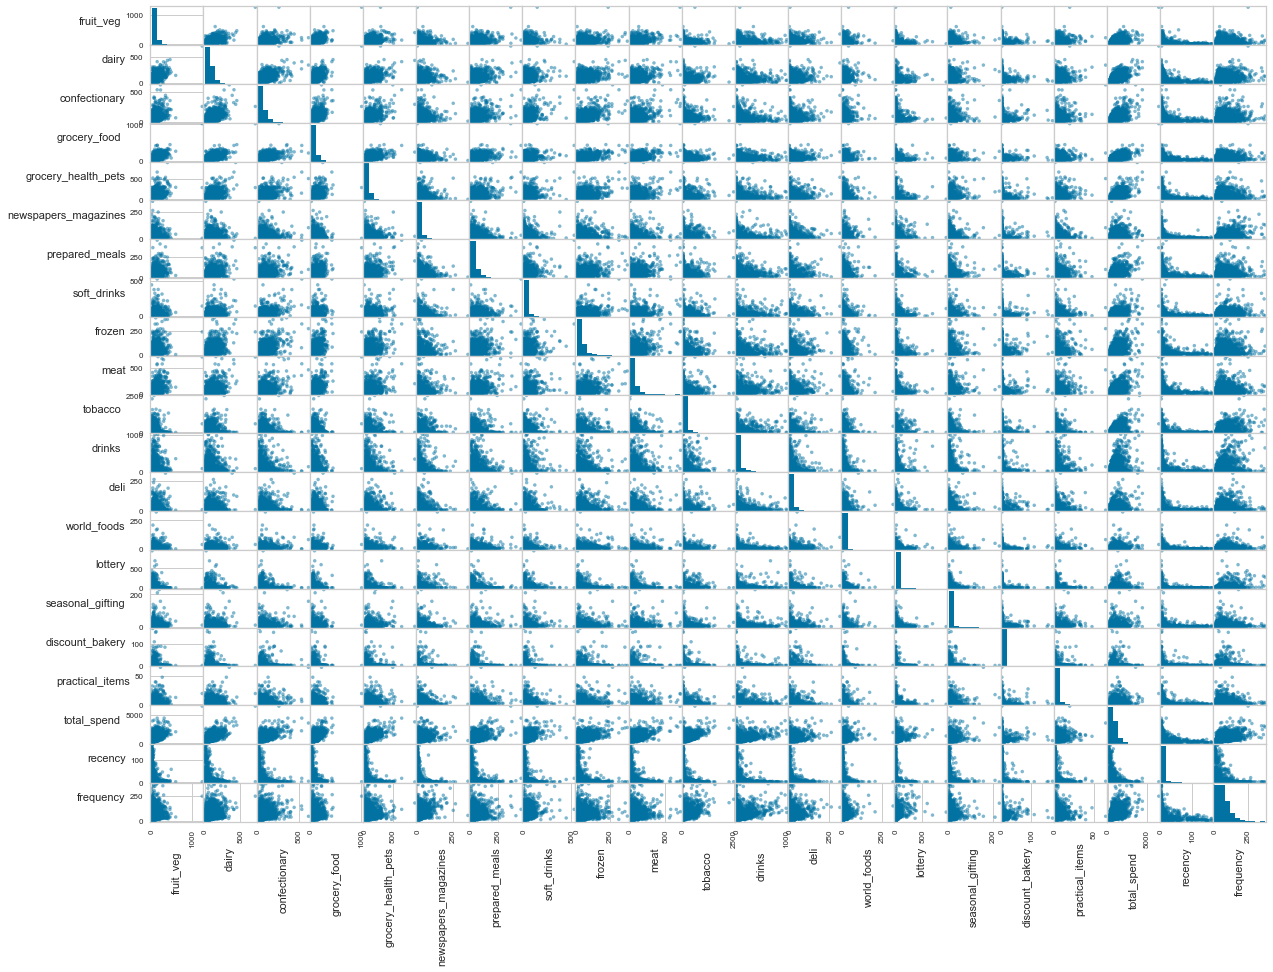

In [66]:
#Visualizaing Correlation graph using scatter matrix
scatter = pd.plotting.scatter_matrix(df, figsize = (20,15))
for ax in scatter.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')

# Data Normalization using Natural Logarithm

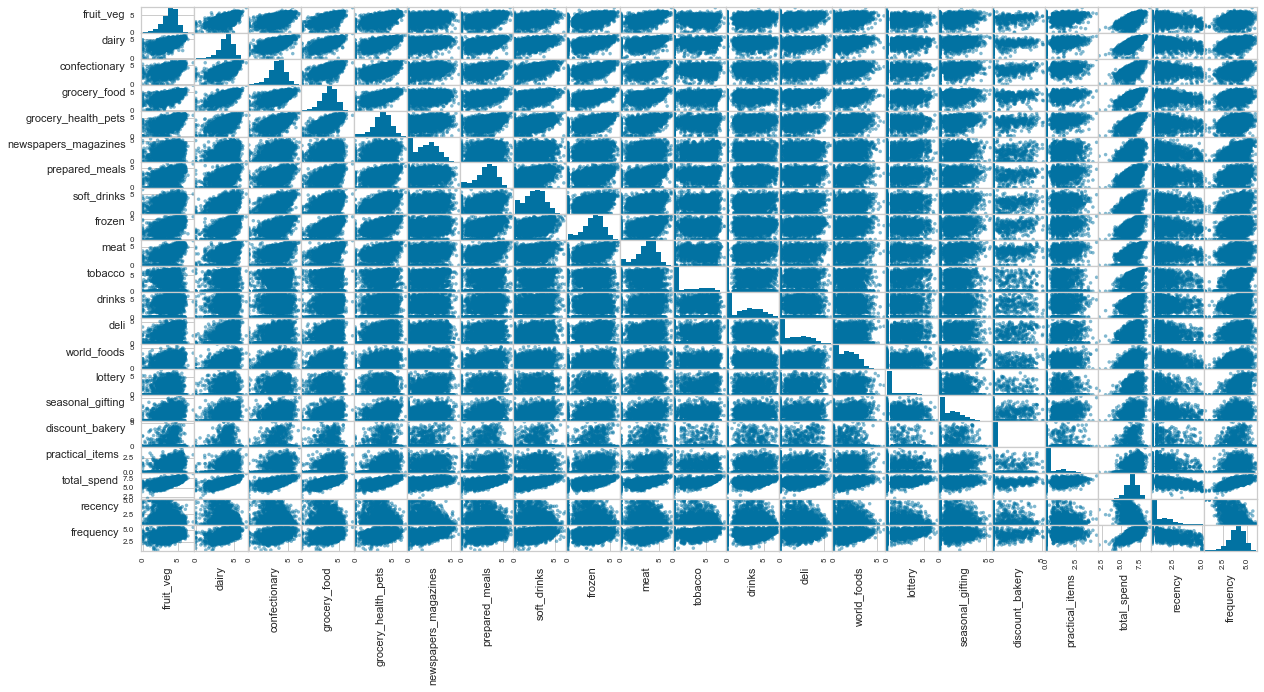

In [67]:
import numpy as np
from sklearn.decomposition import PCA
data = df + 1 

# Scale the data using the natural logarithm
logged_data = np.log(data)

#-- Produce a scatter matrix using the logged data...
scatter = pd.plotting.scatter_matrix(logged_data, figsize = (20,10))
for ax in scatter.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')

# Dimensionality Reduction using PCA

In [68]:
import matplotlib.cm as cm
def pca_results(logged_data, pca):


    # Dimension indexing
    dimensions = dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]

    # PCA components
    components = pd.DataFrame(np.round(pca.components_, 4), columns = list(logged_data.keys()))
    components.index = dimensions

    # PCA explained variance
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance'])
    variance_ratios.index = dimensions

    # Create a bar plot visualization
    fig, ax = plt.subplots(figsize = (15,12))

    # Plot the feature weights as a function of the components
    components.plot(ax = ax, kind = 'bar');
    ax.set_ylabel("Feature Weights")
    ax.set_xticklabels(dimensions, rotation=0)


    # Display the explained variance ratios
    for i, ev in enumerate(pca.explained_variance_ratio_):
        ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Explained Variance\n          %.4f"%(ev))

    # Return a concatenated DataFrame
    return pd.concat([variance_ratios, components], axis = 1)

Explained Variance Ratio => [0.24061195 0.18241126 0.11314091 0.06837479 0.0581338 ]

Explained Variance Ratio(csum) => [0.24061195 0.4230232  0.53616412 0.60453891 0.6626727 ]



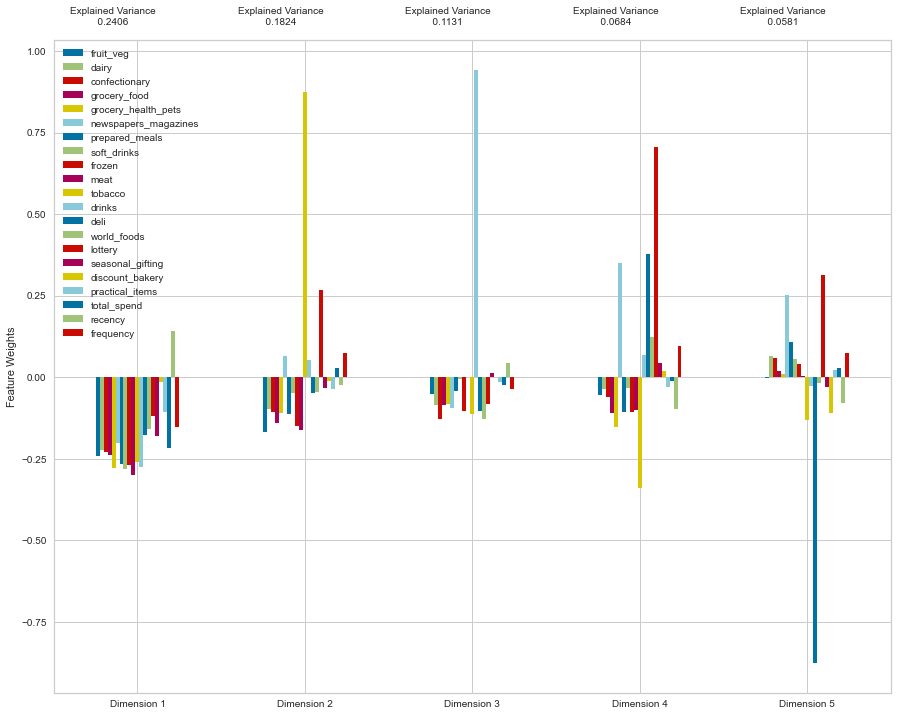

In [69]:
pca = PCA(n_components = 5)
pca.fit(logged_data)


print("Explained Variance Ratio => {}\n".format(pca.explained_variance_ratio_))
print("Explained Variance Ratio(csum) => {}\n".format(pca.explained_variance_ratio_.cumsum()))

# Generate PCA results plot
pca_results = pca_results(logged_data, pca)

In [32]:
# DataFrame of results
display(pca_results)

# DataFrame
display(type(pca_results))

# Cumulative explained variance should add to 1
display(pca_results['Explained Variance'].cumsum())

,Explained Variance,fruit_veg,dairy,confectionary,grocery_food,grocery_health_pets,newspapers_magazines,prepared_meals,soft_drinks,frozen,...,drinks,deli,world_foods,lottery,seasonal_gifting,discount_bakery,practical_items,total_spend,recency,frequency
Dimension 1,0.2406,-0.2420,-0.2241,-0.2286,-0.2380,-0.2786,-0.2009,-0.2652,-0.2824,-0.2689,...,-0.2766,-0.1791,-0.1586,-0.1194,-0.1819,-0.0142,-0.1067,-0.2177,0.1410,-0.1543
Dimension 2,0.1824,-0.1673,-0.0986,-0.1056,-0.1406,-0.1095,0.0661,-0.1127,-0.0476,-0.1489,...,0.0524,-0.0488,-0.0465,0.2685,-0.0342,-0.0127,-0.0371,0.0267,-0.0236,0.0729
Dimension 3,0.1131,-0.0534,-0.0848,-0.1272,-0.0845,-0.0834,-0.0960,-0.0421,-0.0074,-0.1042,...,0.9414,-0.1050,-0.1276,-0.0833,0.0136,0.0011,-0.0145,-0.0238,0.0447,-0.0367
Dimension 4,0.0684,-0.0538,-0.0368,-0.0605,-0.1097,-0.1543,0.3501,-0.1078,-0.0343,-0.1085,...,0.0673,0.3790,0.1231,0.7054,0.0423,0.0172,-0.0294,-0.0126,-0.0993,0.0942
Dimension 5,0.0581,-0.0044,0.0639,0.0578,0.0194,0.0105,0.2521,0.1084,0.0561,0.0390,...,-0.0290,-0.8776,-0.0169,0.3120,-0.0308,-0.1087,0.0207,0.0287,-0.0810,0.0741


pandas.core.frame.DataFrame

Dimension 1    0.2406
Dimension 2    0.4230
Dimension 3    0.5361
Dimension 4    0.6045
Dimension 5    0.6626
Name: Explained Variance, dtype: float64

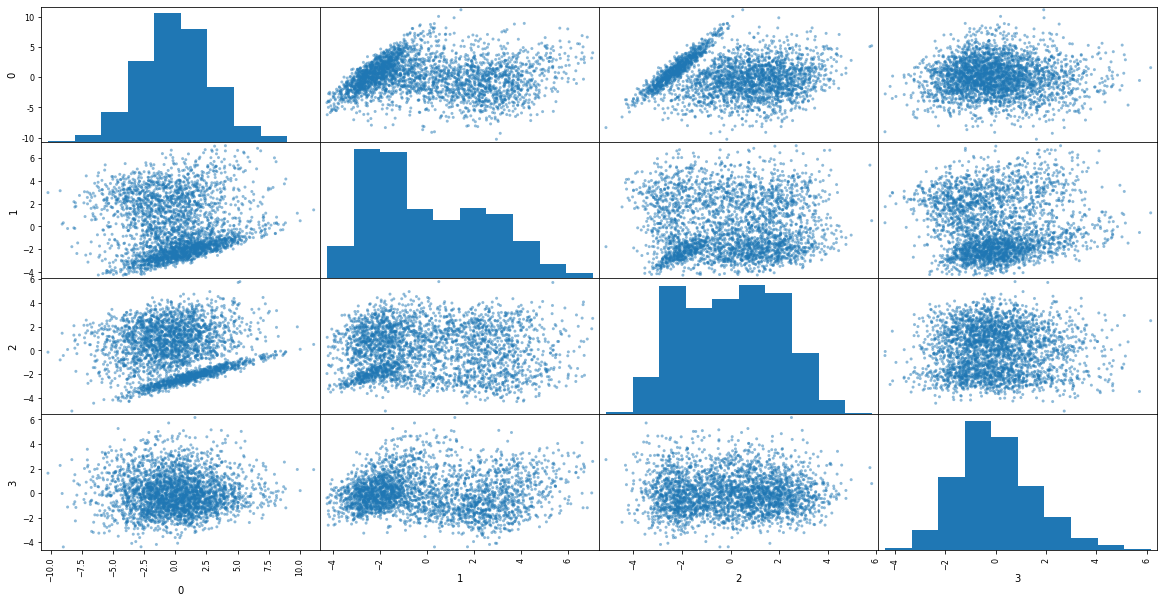

In [33]:
# TODO: Apply PCA by fitting the good data with only four dimensions
pca = PCA(n_components=4)
pca.fit(logged_data)

# Transform the good data using the PCA fit above
reduced_data = pca.transform(logged_data)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data)
scatter = pd.plotting.scatter_matrix(reduced_data, figsize = (20,10))



# Clustering using K-means Algorithm

In [34]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

k = 5
clusterer = KMeans(n_clusters=k)
clusterer.fit(reduced_data)

#Predict the cluster for each data point
preds = clusterer.predict(reduced_data)
    
score = silhouette_score(reduced_data, preds, metric='euclidean')
print("For n_clusters = {}. The average silhouette_score is : {})".format(k, score))


For n_clusters = 5. The average silhouette_score is : 0.23455646945400405)


In [35]:
# Create range of clusters 
range_n_clusters = list(range(2,9))
print(range_n_clusters)

# Loop through clusters
for n_clusters in range_n_clusters:
   
    clusterer = KMeans(n_clusters=n_clusters).fit(reduced_data)
    preds = clusterer.predict(reduced_data)
    centers = clusterer.cluster_centers_
    score = silhouette_score(reduced_data, preds, metric='euclidean')
    print("For n_clusters = {}. The average silhouette_score is : {})".format(n_clusters, score))
    
    

[2, 3, 4, 5, 6, 7, 8]
For n_clusters = 2. The average silhouette_score is : 0.26969541802297553)
For n_clusters = 3. The average silhouette_score is : 0.24416764916282432)
For n_clusters = 4. The average silhouette_score is : 0.23217184233451432)
For n_clusters = 5. The average silhouette_score is : 0.234551804195964)
For n_clusters = 6. The average silhouette_score is : 0.22679756097657816)
For n_clusters = 7. The average silhouette_score is : 0.22881479423913106)
For n_clusters = 8. The average silhouette_score is : 0.23133716878153704)


Visualization - Average Silhouette Score

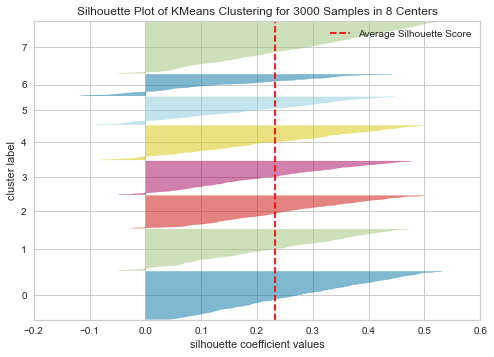

In [36]:
!pip install yellowbrick
from yellowbrick.cluster import SilhouetteVisualizer

model = KMeans(n_clusters=n_clusters)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(reduced_data)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

Visualization - Clusters

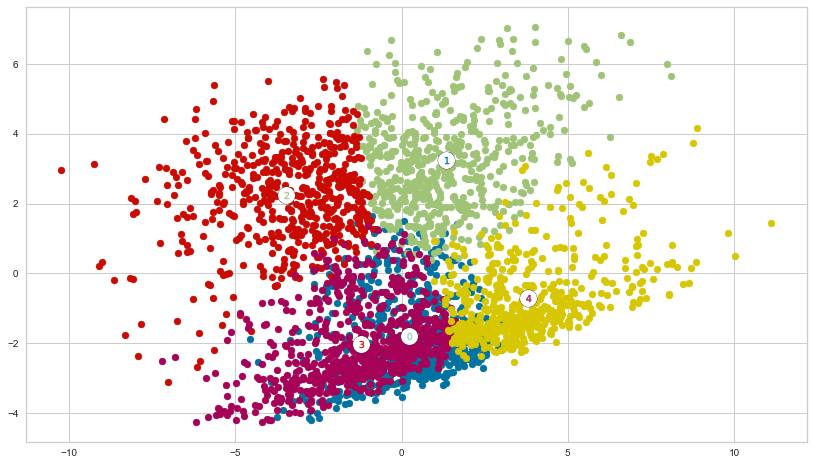

In [933]:
#-- Our final clustering solution
clusterer = KMeans(n_clusters=5).fit(reduced_data)
preds = clusterer.predict(reduced_data)
centres = clusterer.cluster_centers_
#number = df.customer_number
#print(number)

#-- Put the predictions into a pandas dataframe format
assignments = pd.DataFrame(preds, columns = ['Cluster'])

#-- Put the predictions into a pandas dataframe format
plot_data = pd.concat([number, assignments, reduced_data], axis = 1)
#print(plot_data)

#-- Color the points based on assigned cluster (n.b scatter will do this for us automatically)
plt.rcParams['figure.figsize'] = (14.0, 8.0)

for i, c in plot_data.groupby('Cluster'):  
    plt.scatter(c[0], c[1])
    
#-- Plot where the cluster centers are
for i, c in enumerate(centres):
    plt.scatter(x = c[0], y = c[1], color = 'white', edgecolors = 'black', marker = 'o', s=300);
    plt.scatter(x = c[0], y = c[1], marker='${}$'.format(i), alpha = 1, s=50);
#plot_data.groupby('Cluster').head()


# Cluster's Statistical Summary

In [934]:
# Inverse transform the centres
log_centres = pca.inverse_transform(centres)

#Exponentiate the centres
true_centres = np.exp(log_centres)

# Display the true centres
segments = ['Segment {}'.format(i) for i in range(0, len(centres))]
true_centres = pd.DataFrame(np.round(true_centres), columns = df.columns)
true_centres.index = segments

In [935]:
rfm = true_centres.columns[18:]
grocery = true_centres.columns[0:5]
others = true_centres.columns[5:18]

In [936]:
true_centres[rfm]

,total_spend,recency,frequency
Segment 0,584.0,5.0,48.0
Segment 1,505.0,6.0,51.0
Segment 2,1396.0,3.0,103.0
Segment 3,736.0,4.0,52.0
Segment 4,260.0,8.0,27.0


In [937]:
true_centres[grocery]

,fruit_veg,dairy,confectionary,grocery_food,grocery_health_pets
Segment 0,62.0,69.0,57.0,57.0,47.0
Segment 1,19.0,29.0,21.0,19.0,19.0
Segment 2,71.0,92.0,69.0,68.0,76.0
Segment 3,77.0,74.0,53.0,63.0,55.0
Segment 4,19.0,23.0,16.0,17.0,12.0


In [938]:
true_centres[others]

,newspapers_magazines,prepared_meals,soft_drinks,frozen,meat,tobacco,drinks,deli,world_foods,lottery,seasonal_gifting,discount_bakery,practical_items
Segment 0,8.0,25.0,12.0,30.0,34.0,2.0,2.0,7.0,7.0,2.0,3.0,1.0,2.0
Segment 1,6.0,10.0,7.0,9.0,12.0,118.0,9.0,3.0,3.0,4.0,2.0,1.0,1.0
Segment 2,17.0,40.0,28.0,37.0,56.0,156.0,31.0,8.0,8.0,7.0,6.0,1.0,2.0
Segment 3,8.0,32.0,18.0,32.0,55.0,2.0,57.0,6.0,6.0,2.0,5.0,1.0,2.0
Segment 4,3.0,8.0,4.0,7.0,10.0,1.0,7.0,3.0,3.0,2.0,2.0,1.0,1.0


In [76]:
 
final_assignments = pd.concat([number,assignments,df], axis = 1)

#Create a loop that describes summary statistics for each segment
for c, d in final_assignments.groupby('Cluster'):  
    print("SEGMENT", c)
    display(d.describe())

    #print(c,d)
#print(final_assignments)

NameError: name 'assignments' is not defined

In [959]:
final_assignments.head()

,customer_number,Cluster,fruit_veg,dairy,confectionary,grocery_food,grocery_health_pets,newspapers_magazines,prepared_meals,soft_drinks,...,drinks,deli,world_foods,lottery,seasonal_gifting,discount_bakery,practical_items,total_spend,recency,frequency
0,11387,2,64.58,35.91,107.78,27.08,29.59,54.83,6.35,22.83,...,28.02,28.12,28.54,2.0,7.48,0.0,0.84,697.76,13,64
1,8171,0,16.89,37.24,28.84,33.43,66.40,22.06,12.09,2.34,...,8.42,2.65,3.76,0.0,9.99,0.0,0.00,369.31,2,50
2,1060,0,87.30,82.98,49.88,20.57,37.04,9.85,57.98,31.12,...,0.00,2.60,0.00,18.0,106.46,0.0,0.00,668.68,15,40
3,3728,2,84.05,186.56,175.50,119.84,111.08,13.05,25.54,124.42,...,0.00,0.00,0.00,4.0,0.00,0.0,4.50,1104.10,2,51
4,14621,0,35.16,121.31,79.23,29.03,37.17,40.06,0.00,4.68,...,2.55,99.16,0.00,0.0,3.40,0.0,0.00,524.45,8,90


# Create 'Cluster Name' Column 

In [981]:
#create cluster names as high_value(0) -a , at_risk(1) - b, loyal(2) - c , potential(3) - d, low_value(4) - e
def func(item):
    dict = {0:"a", 1:"b", 2:"c", 3:"d", 4:"e"}
    for i,v in dict.items():
        if item == i:
            return v
        
final_assignments["name"] = final_assignments["Cluster"]
final_assignments["name"] = final_assignments["name"].apply(func)

In [982]:
final_assignments.head()

,customer_number,Cluster,fruit_veg,dairy,confectionary,grocery_food,grocery_health_pets,newspapers_magazines,prepared_meals,soft_drinks,...,deli,world_foods,lottery,seasonal_gifting,discount_bakery,practical_items,total_spend,recency,frequency,name
0,11387,2,64.58,35.91,107.78,27.08,29.59,54.83,6.35,22.83,...,28.12,28.54,2.0,7.48,0.0,0.84,697.76,13,64,c
1,8171,0,16.89,37.24,28.84,33.43,66.40,22.06,12.09,2.34,...,2.65,3.76,0.0,9.99,0.0,0.00,369.31,2,50,a
2,1060,0,87.30,82.98,49.88,20.57,37.04,9.85,57.98,31.12,...,2.60,0.00,18.0,106.46,0.0,0.00,668.68,15,40,a
3,3728,2,84.05,186.56,175.50,119.84,111.08,13.05,25.54,124.42,...,0.00,0.00,4.0,0.00,0.0,4.50,1104.10,2,51,c
4,14621,0,35.16,121.31,79.23,29.03,37.17,40.06,0.00,4.68,...,99.16,0.00,0.0,3.40,0.0,0.00,524.45,8,90,a


# Export Clusters 

In [983]:
#export clusters to csv file
final_assignments.to_csv("output.csv")